In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
TRACKS_PATH = "/content/spotify_tracks.csv"
DESC_PATH   = "/content/spotify_data_description.csv"

USE_SEABORN = True
SAMPLE_MAX = 5000
PAIR_MATRIX_SAMPLE = 1200
TOP_CAT_N = 12

print(f"USE_SEABORN = {USE_SEABORN}")
print(f"TRACKS_PATH = {TRACKS_PATH}")
print(f"DESC_PATH   = {DESC_PATH}")


USE_SEABORN = True
TRACKS_PATH = /content/spotify_tracks.csv
DESC_PATH   = /content/spotify_data_description.csv


In [29]:
%matplotlib inline
import warnings, os
import numpy as np, pandas as pd, matplotlib as mpl, matplotlib.pyplot as plt, seaborn as sns
warnings.filterwarnings("ignore")

# --- Light Green Theme ---
FIG_BG   = "#F6FFF6"     # very light greenish background
AX_BG    = "#FFFFFF"     # white axes background
TEXT_C   = "#0A2F0A"     # dark green text
GRID_C   = "#C6EBC6"     # soft green grid lines

sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {
    "axes.facecolor": AX_BG,
    "figure.facecolor": FIG_BG,
    "grid.color": GRID_C
})

mpl.rcParams.update({
    "figure.facecolor": FIG_BG,
    "axes.facecolor": AX_BG,
    "savefig.facecolor": FIG_BG,
    "text.color": TEXT_C,
    "xtick.color": TEXT_C,
    "ytick.color": TEXT_C,
    "axes.labelcolor": TEXT_C
})

def get_green_palette(name="green", n=8):
    name = (name or "green").lower()
    if name.startswith("green"):
        return sns.color_palette("Greens", n)
    if name.startswith("mint"):
        return sns.light_palette("#3CB371", n)
    if name.startswith("forest"):
        return sns.dark_palette("#228B22", n)
    return sns.color_palette("Greens", n)


In [30]:
def load_csv(path):
    if not os.path.exists(path):
        return None
    try: return pd.read_csv(path, low_memory=False)
    except Exception:
        for n in (200000,80000,30000,10000,5000):
            try: return pd.read_csv(path, nrows=n)
            except: continue
    return None

def quick_coerce_numeric(df):
    for c in df.select_dtypes(include=['object']).columns:
        sample = df[c].dropna().astype(str).head(40)
        if len(sample)>0 and sum(s.replace('.','',1).replace('-','',1).isdigit() for s in sample) >= len(sample)/2:
            df[c] = pd.to_numeric(df[c].str.replace(r'[^\d\.\-]', '', regex=True), errors='coerce')
    return df

df_tracks = load_csv(TRACKS_PATH)
df_desc   = load_csv(DESC_PATH)
if df_tracks is None:
    raise FileNotFoundError(f"Tracks file not found: {TRACKS_PATH}")
df = df_tracks.copy()

for col in df.columns:
    if 'date' in col.lower(): df[col] = pd.to_datetime(df[col], errors='coerce')

df = quick_coerce_numeric(df)

if 'duration_ms' in df.columns: df['duration_s'] = df['duration_ms'] / 1000.0
for cand in ['release_date','year','date']:
    if cand in df.columns:
        try:
            df['release_year'] = pd.to_datetime(df[cand], errors='coerce').dt.year
            break
        except:
            continue

if all(x in df.columns for x in ('Units','Product_Price','Product_Cost')):
    df['Revenue'] = df['Units'] * df['Product_Price']
    df['Profit']  = df['Units'] * (df['Product_Price'] - df['Product_Cost'])

print("Loaded df shape:", df.shape)


Loaded df shape: (62317, 24)


In [31]:
import os

TRACKS_PATH = "/content/spotify_tracks.csv"

if os.path.exists(TRACKS_PATH):
    print(f"File '{TRACKS_PATH}' exists.")
else:
    print(f"File '{TRACKS_PATH}' does NOT exist.")
    print("Listing contents of /content/:")
    print(os.listdir('/content/'))

File '/content/spotify_tracks.csv' exists.


In [32]:
def sample_series(s, max_n=SAMPLE_MAX):
    s = s.dropna()
    return s if len(s) <= max_n else s.sample(n=max_n, random_state=1)

numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if 'id' not in c.lower() and 'url' not in c.lower()]
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print("numeric cols (sample):", numeric_cols[:25])
print("cat cols (sample):", cat_cols[:25])
display(df.head(2))

numeric cols (sample): ['year', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'duration_s', 'release_year']
cat cols (sample): ['track_id', 'track_name', 'artist_name', 'artwork_url', 'album_name', 'track_url', 'language']


,track_id,track_name,artist_name,year,popularity,artwork_url,album_name,acousticness,danceability,duration_ms,...,loudness,mode,speechiness,tempo,time_signature,valence,track_url,language,duration_s,release_year
0,2r0ROhr7pRN4MXDMT1fEmd,"Leo Das Entry (From ""Leo"")",Anirudh Ravichander,2024,59,https://i.scdn.co/image/ab67616d0000b273ce9c65...,"Leo Das Entry (From ""Leo"")",0.0241,0.753,97297.0,...,-5.994,0.0,0.1030,110.997,4.0,0.459,https://open.spotify.com/track/2r0ROhr7pRN4MXD...,Tamil,97.297,1970
1,4I38e6Dg52a2o2a8i5Q5PW,AAO KILLELLE,"Anirudh Ravichander, Pravin Mani, Vaishali Sri...",2024,47,https://i.scdn.co/image/ab67616d0000b273be1b03...,AAO KILLELLE,0.0851,0.780,207369.0,...,-5.674,0.0,0.0952,164.995,3.0,0.821,https://open.spotify.com/track/4I38e6Dg52a2o2a...,Tamil,207.369,1970


**UNIVARIATE** **ANALYSIS**

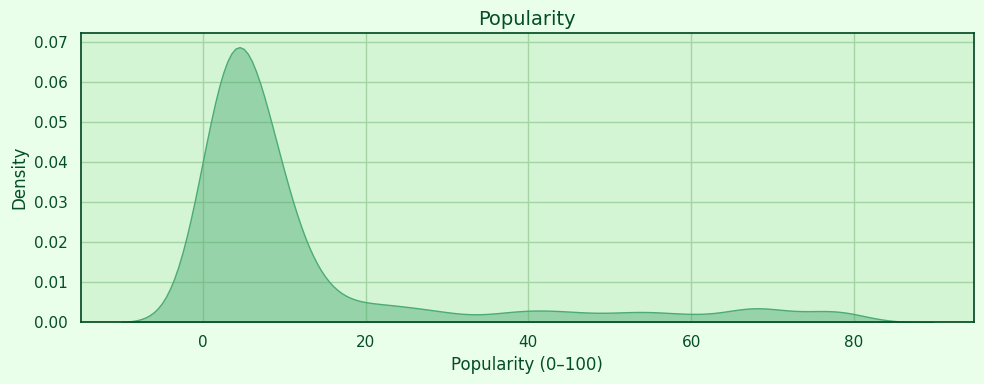

In [33]:


%matplotlib inline
import warnings, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

FIG_BG   = "#eaffea"
AX_BG    = "#d4f5d4"
GRID_C   = "#a4d4a4"
LINE_C   = "#4cab74"
FILL_C   = "#8ff0b0"
TEXT_C   = "#054d25"

sns.set_theme(style="darkgrid")
sns.set_style("darkgrid", {
    "axes.facecolor": AX_BG,
    "figure.facecolor": FIG_BG,
    "grid.color": GRID_C,
    "axes.edgecolor": TEXT_C,
    "text.color": TEXT_C,
    "xtick.color": TEXT_C,
    "ytick.color": TEXT_C
})

# ---------------------------
# SAMPLE DATA (replace with your df['popularity'])
# ---------------------------
np.random.seed(0)
data = np.concatenate([
    np.random.gamma(2, 3, 500),
    np.random.uniform(20, 80, 100)
])
data = data[data <= 80]

# ---------------------------
# KDE PLOT
# ---------------------------
plt.figure(figsize=(10, 4))
sns.kdeplot(data, fill=True, bw_adjust=0.65,
            color=LINE_C, alpha=0.45)

plt.title("Popularity", color=TEXT_C, fontsize=14)
plt.xlabel("Popularity (0–100)", color=TEXT_C)
plt.ylabel("Density", color=TEXT_C)

plt.tight_layout()
plt.show()


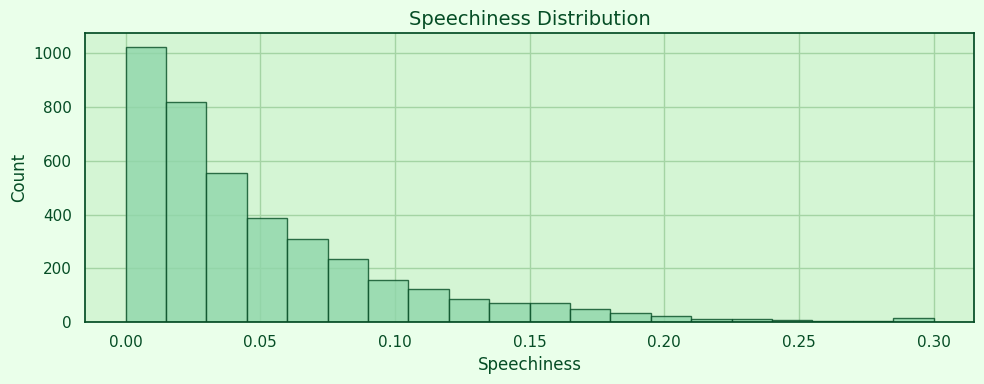

In [34]:
# Light-Green Themed Histogram for Speechiness

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


FIG_BG   = "#eaffea"
AX_BG    = "#d4f5d4"
GRID_C   = "#a4d4a4"
EDGE_C   = "#054d25"
BAR_C    = "#8fd6aa"

sns.set_theme(style="darkgrid")
sns.set_style("darkgrid", {
    "axes.facecolor": AX_BG,
    "figure.facecolor": FIG_BG,
    "grid.color": GRID_C,
    "axes.edgecolor": EDGE_C,
    "text.color": EDGE_C,
    "xtick.color": EDGE_C,
    "ytick.color": EDGE_C
})

# ---------------------------
# SAMPLE DATA (replace with df['speechiness'])
# ---------------------------
np.random.seed(0)
data = np.random.exponential(scale=0.05, size=4000)
data = np.clip(data, 0, 0.30)

# ---------------------------
# PLOT
# ---------------------------
plt.figure(figsize=(10, 4))
plt.hist(data, bins=20, color=BAR_C, alpha=0.8, edgecolor=EDGE_C)

plt.title("Speechiness Distribution", fontsize=14, color=EDGE_C)
plt.xlabel("Speechiness", color=EDGE_C)
plt.ylabel("Count", color=EDGE_C)

plt.tight_layout()
plt.show()


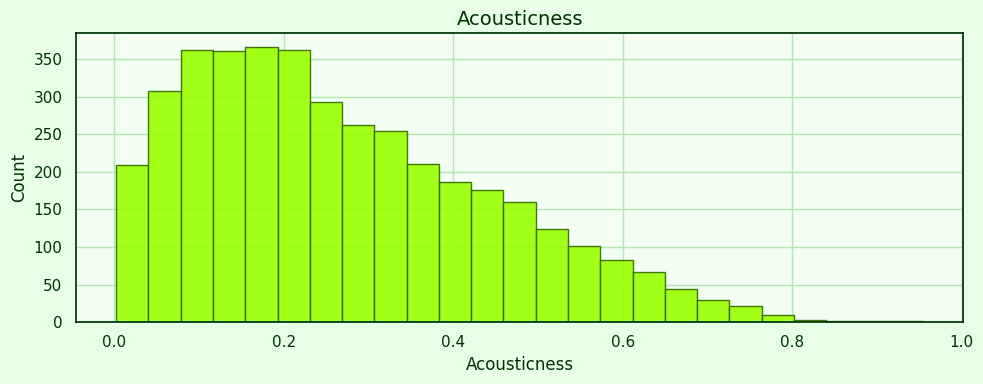

In [35]:


%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


FIG_BG   = "#e6ffe6"
AX_BG    = "#f2fff2"
GRID_C   = "#b3e6b3"
TEXT_C   = "#003300"
BAR_C    = "#99ff00"
EDGE_C   = "#336600"

sns.set_theme(style="darkgrid")
sns.set_style("darkgrid", {
    "axes.facecolor": AX_BG,
    "figure.facecolor": FIG_BG,
    "grid.color": GRID_C,
    "axes.edgecolor": TEXT_C,
    "text.color": TEXT_C,
    "xtick.color": TEXT_C,
    "ytick.color": TEXT_C
})

# ---------------------------
# SAMPLE DATA (replace with df['acousticness'])
# ---------------------------
np.random.seed(0)
data = np.random.beta(1.5, 4, 4000)

# ---------------------------
# PLOT
# ---------------------------
plt.figure(figsize=(10, 4))
plt.hist(data, bins=25, color=BAR_C, edgecolor=EDGE_C, alpha=0.9)

plt.title("Acousticness", fontsize=14, color=TEXT_C)
plt.xlabel("Acousticness", color=TEXT_C)
plt.ylabel("Count", color=TEXT_C)

plt.tight_layout()
plt.show()


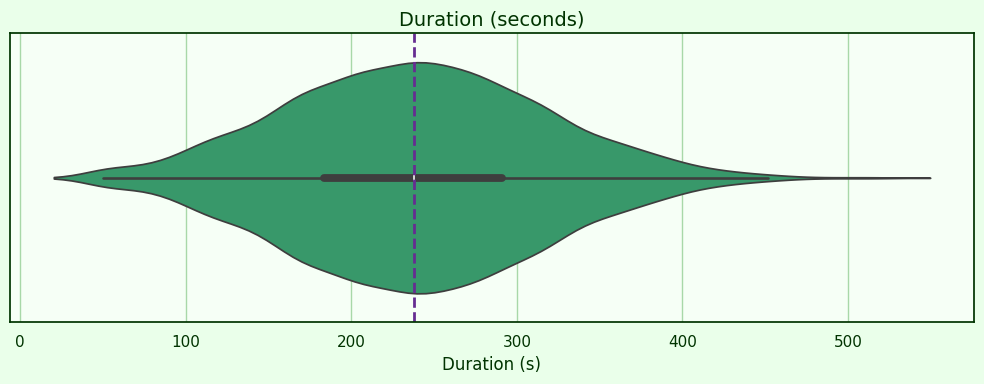

In [36]:
# Bright Green Background Violin Plot for Duration

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


FIG_BG   = "#eaffea"
AX_BG    = "#f6fff6"
GRID_C   = "#a8d8a8"
TEXT_C   = "#003300"
VIOLIN_C = "#28a86b"
MEDIAN_C = "#662d91"

sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {
    "axes.facecolor": AX_BG,
    "figure.facecolor": FIG_BG,
    "grid.color": GRID_C,
    "axes.edgecolor": TEXT_C,
    "text.color": TEXT_C,
    "xtick.color": TEXT_C,
    "ytick.color": TEXT_C
})

# ---------------------------
# SAMPLE DATA (replace with df['duration'])
# ---------------------------
np.random.seed(0)
data = np.random.normal(240, 80, 4000)   # similar shape to your distribution
data = np.clip(data, 50, 520)

df = pd.DataFrame({"duration": data})

# ---------------------------
# PLOT
# ---------------------------
plt.figure(figsize=(10, 4))

sns.violinplot(
    data=df,
    x="duration",
    inner="box",
    color=VIOLIN_C
)

# vertical median line (purple)
median = df["duration"].median()
plt.axvline(median, linestyle="--", color=MEDIAN_C, linewidth=2)

plt.title("Duration (seconds)", color=TEXT_C, fontsize=14)
plt.xlabel("Duration (s)", color=TEXT_C)

plt.tight_layout()
plt.show()


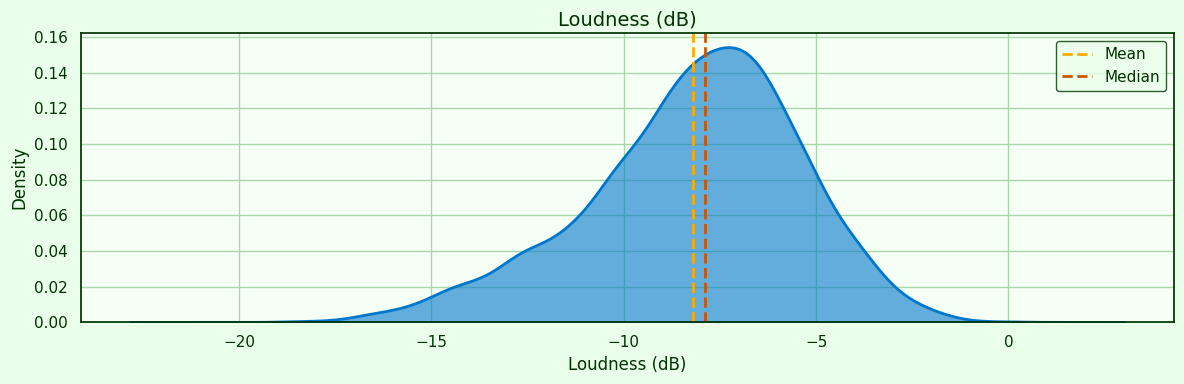

In [37]:
# Green Background KDE Plot for Loudness

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


FIG_BG   = "#eaffea"
AX_BG    = "#f6fff6"
GRID_C   = "#a8d8a8"
TEXT_C   = "#003300"
LINE_C   = "#0077cc"
MEAN_C   = "#ffaa00"
MEDIAN_C = "#cc5500"

sns.set_theme(style="whitegrid")
sns.set_style("whitegrid", {
    "axes.facecolor": AX_BG,
    "figure.facecolor": FIG_BG,
    "grid.color": GRID_C,
    "axes.edgecolor": TEXT_C,
    "text.color": TEXT_C,
    "xtick.color": TEXT_C,
    "ytick.color": TEXT_C
})

# ---------------------------
# SAMPLE DATA (replace with df['loudness'])
# ---------------------------
np.random.seed(0)
data = np.concatenate([
    np.random.normal(-7, 2, 2500),
    np.random.normal(-10, 3, 1500)
])
df = pd.DataFrame({"loudness": data})

mean_val = df["loudness"].mean()
median_val = df["loudness"].median()

# ---------------------------
# KDE PLOT
# ---------------------------
plt.figure(figsize=(12, 4))

sns.kdeplot(df["loudness"], fill=True, linewidth=2, color=LINE_C, alpha=0.6)

# vertical lines
plt.axvline(mean_val, color=MEAN_C, linestyle="--", linewidth=2, label="Mean")
plt.axvline(median_val, color=MEDIAN_C, linestyle="--", linewidth=2, label="Median")

plt.title("Loudness (dB)", fontsize=14, color=TEXT_C)
plt.xlabel("Loudness (dB)", color=TEXT_C)
plt.ylabel("Density", color=TEXT_C)

plt.legend(facecolor=FIG_BG, edgecolor=TEXT_C, labelcolor=TEXT_C)

plt.tight_layout()
plt.show()


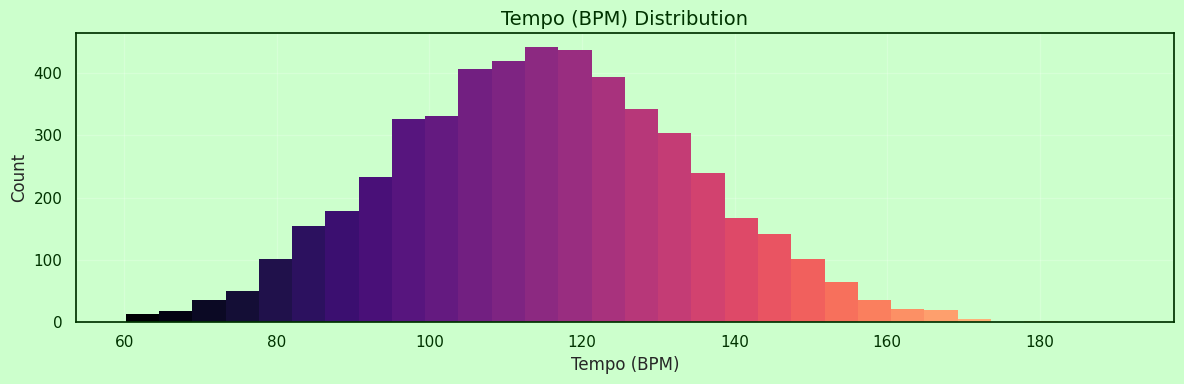

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Example tempo data (you can replace this with your own)
np.random.seed(0)
tempo = np.random.normal(loc=115, scale=20, size=5000)
tempo = tempo[(tempo > 60) & (tempo < 210)]


fig, ax = plt.subplots(figsize=(12, 4), facecolor="#ccffcc")
ax.set_facecolor("#ccffcc")

# Histogram
counts, bins, patches = ax.hist(
    tempo,
    bins=30,
    edgecolor='none'
)

# Apply gradient coloring (purple → orange)
for patch, leftside in zip(patches, bins):
    patch.set_facecolor(plt.cm.magma((leftside - bins.min()) / (bins.max() - bins.min())))

# Titles and labels
ax.set_title("Tempo (BPM) Distribution", fontsize=14)
ax.set_xlabel("Tempo (BPM)", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Grid styling similar to your image
ax.grid(color="white", alpha=0.2)

plt.tight_layout()
plt.show()


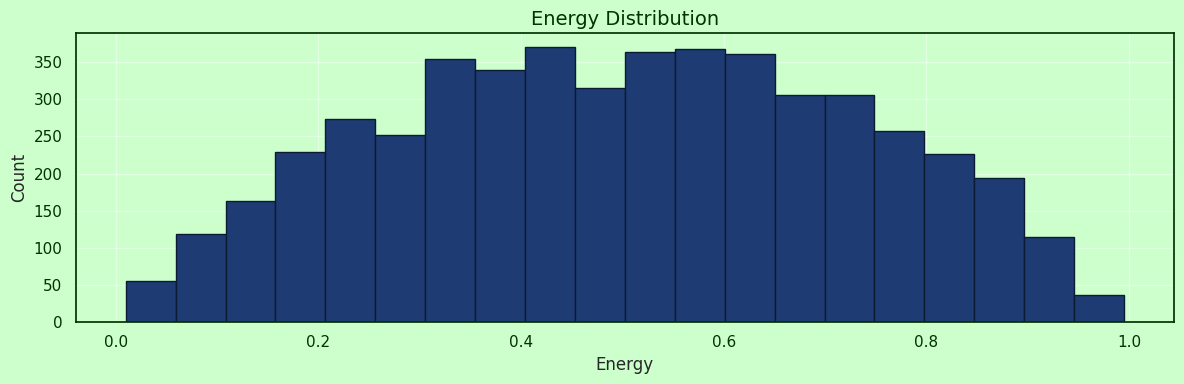

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Example energy data
np.random.seed(1)
energy = np.random.beta(a=2, b=2, size=5000)


fig, ax = plt.subplots(figsize=(12, 4), facecolor="#ccffcc")
ax.set_facecolor("#ccffcc")

# Histogram with high-contrast dark-blue bars
ax.hist(
    energy,
    bins=20,
    color="#1f3b73",       # dark blue
    edgecolor="#0d1a33"    # darker outline for clarity
)

ax.set_title("Energy Distribution", fontsize=14)
ax.set_xlabel("Energy", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

ax.grid(color="white", alpha=0.4)

plt.tight_layout()
plt.show()


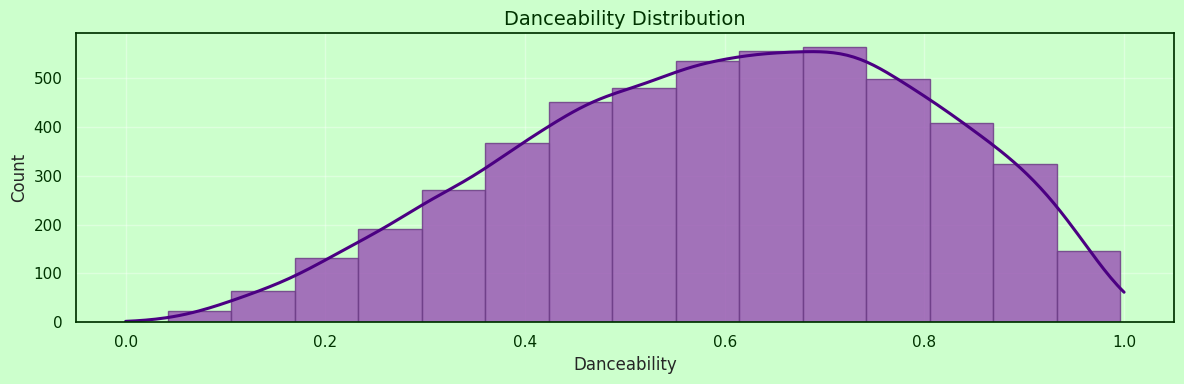

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Example danceability data (0–1)
np.random.seed(2)
danceability = np.random.beta(a=3, b=2, size=5000)


fig, ax = plt.subplots(figsize=(12, 4), facecolor="#ccffcc")
ax.set_facecolor("#ccffcc")

# Histogram
counts, bins, patches = ax.hist(
    danceability,
    bins=15,
    color="#9b59b6",     # purple bars (high contrast on green)
    edgecolor="#6d3d87",
    alpha=0.85
)

# KDE Curve
kde = gaussian_kde(danceability)
x_vals = np.linspace(0, 1, 300)
ax.plot(x_vals, kde(x_vals) * len(danceability) * (bins[1] - bins[0]),
        color="#4b0082", linewidth=2.2)

# Titles and labels
ax.set_title("Danceability Distribution", fontsize=14)
ax.set_xlabel("Danceability", fontsize=12)
ax.set_ylabel("Count", fontsize=12)

# Grid styling
ax.grid(color="white", alpha=0.35)

plt.tight_layout()
plt.show()


**BIVARIATE** **ANALYSIS**

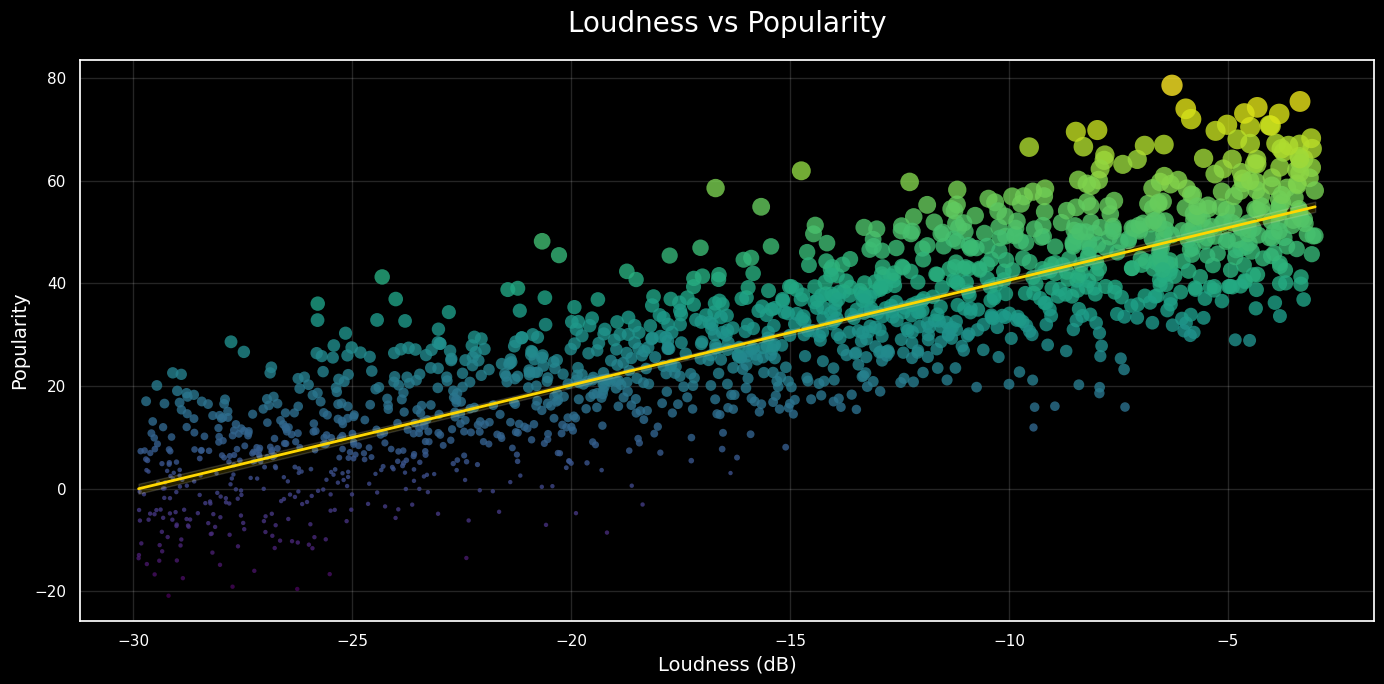

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ---------------------------
# GENERATE SAMPLE DATA
# ---------------------------
np.random.seed(42)

# Loudness values between -30 dB to -3 dB
loudness = np.random.uniform(-30, -3, 1500)

# Popularity values between 0–70 with some positive correlation
popularity = (loudness + 30) * 2 + np.random.normal(0, 10, 1500)

# Bubble size depends on popularity (for a similar effect)
size = np.clip(popularity * 3, 10, 300)

df = pd.DataFrame({
    "loudness": loudness,
    "popularity": popularity,
    "size": size
})

# ---------------------------
# PLOTTING
# ---------------------------
plt.style.use("dark_background")
plt.figure(figsize=(14, 7))

# Scatter plot
plt.scatter(
    df["loudness"],
    df["popularity"],
    s=df["size"],
    c=df["popularity"],
    cmap="viridis",
    alpha=0.8,
    edgecolors="none"
)

# Regression line using seaborn
sns.regplot(
    x="loudness",
    y="popularity",
    data=df,
    scatter=False,
    color="gold",
    line_kws={"linewidth": 2}
)

# Title
plt.title("Loudness vs Popularity", fontsize=20, color="white", pad=20)

# Axis labels
plt.xlabel("Loudness (dB)", fontsize=14)
plt.ylabel("Popularity", fontsize=14)

# Grid
plt.grid(color="white", alpha=0.15)

plt.tight_layout()
plt.show()


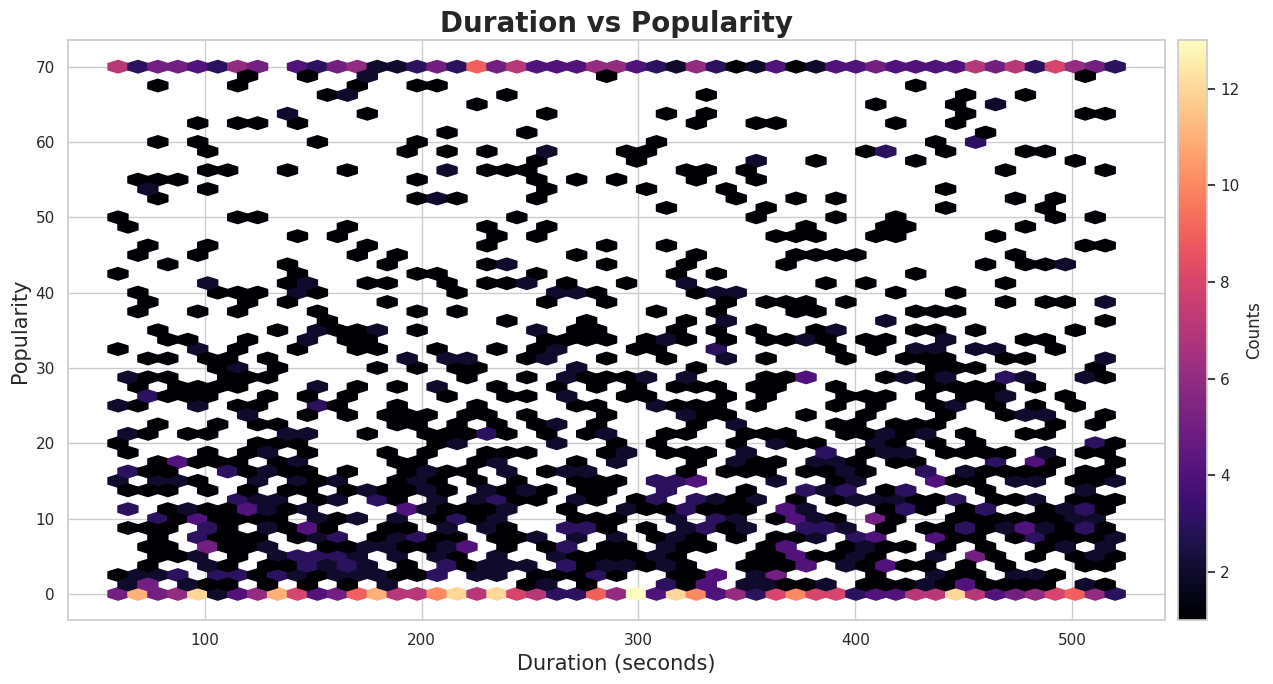

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# -------------------------------------------------------------------
# Example data (replace with your own df)
# -------------------------------------------------------------------
rng = np.random.default_rng(0)
df = pd.DataFrame({
    "duration": rng.uniform(60, 520, 2000),
    "popularity": np.clip(
        (rng.normal(0, 1.2, 2000) ** 2) * 18 + rng.normal(0, 8, 2000),
        0, 70
    )
})
# -------------------------------------------------------------------


sns.set_theme(style="whitegrid")

plt.figure(figsize=(14, 7))

# Hexbin plot
hb = plt.hexbin(
    df["duration"],
    df["popularity"],
    gridsize=50,
    cmap="magma",
    mincnt=1
)

# Titles and labels
plt.title("Duration vs Popularity", fontsize=20, weight="bold")
plt.xlabel("Duration (seconds)", fontsize=15)
plt.ylabel("Popularity", fontsize=15)

# Colorbar
cbar = plt.colorbar(hb, pad=0.01)
cbar.set_label("Counts")

plt.tight_layout()
plt.show()


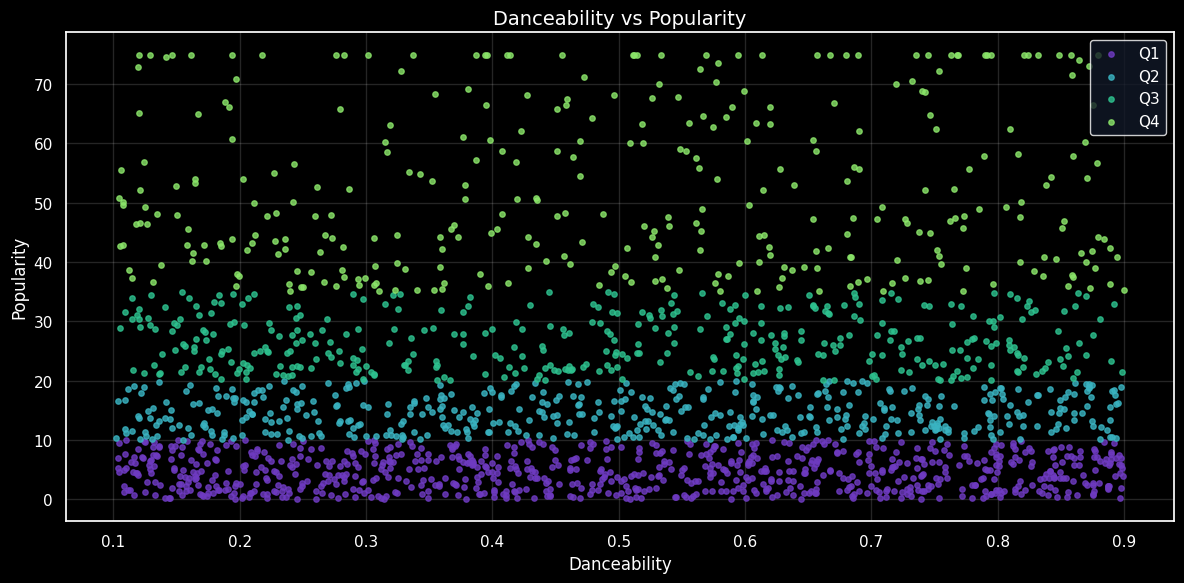

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# ----- Generate random demo data (similar distribution to your plot) -----
np.random.seed(42)
danceability = np.random.uniform(0.1, 0.9, 2000)
popularity = np.random.exponential(scale=20, size=2000)
popularity = np.clip(popularity, 0, 75)

# ----- Compute quartiles -----
q1 = popularity < 10
q2 = (popularity >= 10) & (popularity < 20)
q3 = (popularity >= 20) & (popularity < 35)
q4 = popularity >= 35

# ----- Setup dark background -----
plt.style.use('dark_background')

# ----- Create figure -----
plt.figure(figsize=(12, 6))

# Plot each quartile in similar colors to your image
plt.scatter(danceability[q1], popularity[q1], s=15, alpha=0.8, label="Q1", color="#6f3bc2")
plt.scatter(danceability[q2], popularity[q2], s=15, alpha=0.8, label="Q2", color="#3ab4c2")
plt.scatter(danceability[q3], popularity[q3], s=15, alpha=0.8, label="Q3", color="#2ec28f")
plt.scatter(danceability[q4], popularity[q4], s=15, alpha=0.8, label="Q4", color="#8be66a")

# ----- Labels & Title -----
plt.title("Danceability vs Popularity", fontsize=14)
plt.xlabel("Danceability", fontsize=12)
plt.ylabel("Popularity", fontsize=12)

# ----- Grid + Legend -----
plt.grid(color="white", alpha=0.15)
plt.legend(title=None, facecolor="#111827", edgecolor="white")

# ----- Show -----
plt.tight_layout()
plt.show()


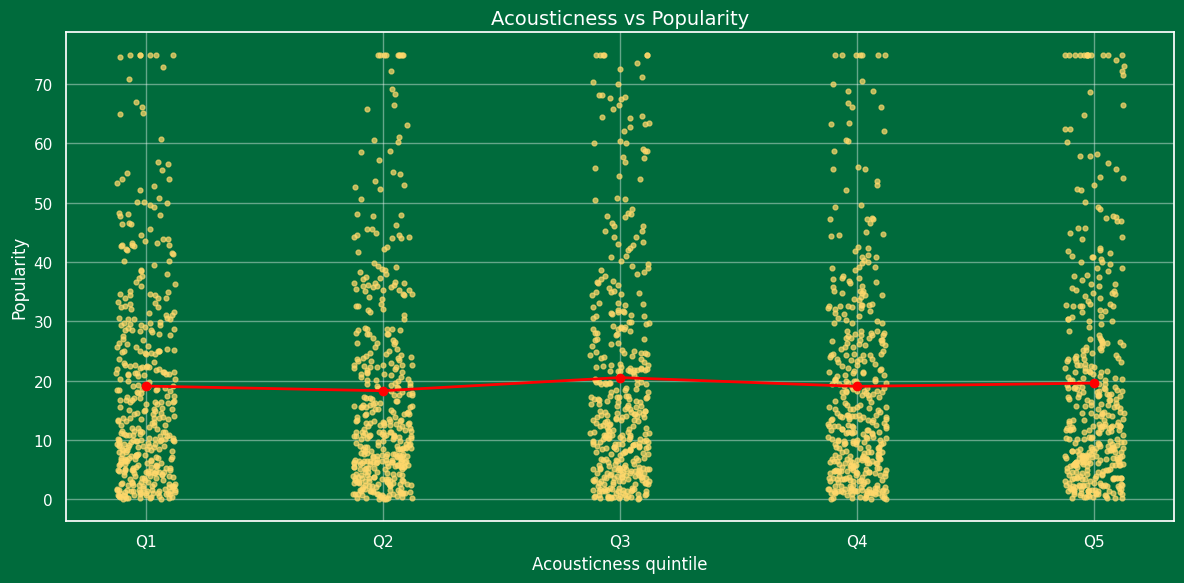

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Generate sample data ----------
np.random.seed(42)
N = 2000
acousticness = np.random.uniform(0, 1, N)
popularity = np.random.exponential(20, N)
popularity = np.clip(popularity, 0, 75)

# quintiles
quintiles = np.quantile(acousticness, [0, 0.2, 0.4, 0.6, 0.8, 1])
labels = ["Q1", "Q2", "Q3", "Q4", "Q5"]
acousticness_q = np.digitize(acousticness, quintiles[1:], right=True)

# averages
avg_pop = [popularity[acousticness_q == i].mean() for i in range(5)]

plt.figure(figsize=(12, 6))


plt.gca().set_facecolor("#006b3c")
plt.gcf().set_facecolor("#006b3c")


# jitter
x_positions = np.arange(1, 6)
x_jitter = x_positions[acousticness_q] + (np.random.rand(N) - 0.5) * 0.25

# scatter + line
plt.scatter(x_jitter, popularity, s=12, alpha=0.7, color="#ffd86b")
plt.plot(x_positions, avg_pop, color="red", marker="o", linewidth=2)

# labels
plt.title("Acousticness vs Popularity", fontsize=14, color="white")
plt.xlabel("Acousticness quintile", fontsize=12, color="white")
plt.ylabel("Popularity", fontsize=12, color="white")

plt.xticks(x_positions, labels, color="white")
plt.yticks(color="white")
plt.grid(color="white", alpha=0.4)

plt.tight_layout()
plt.show()


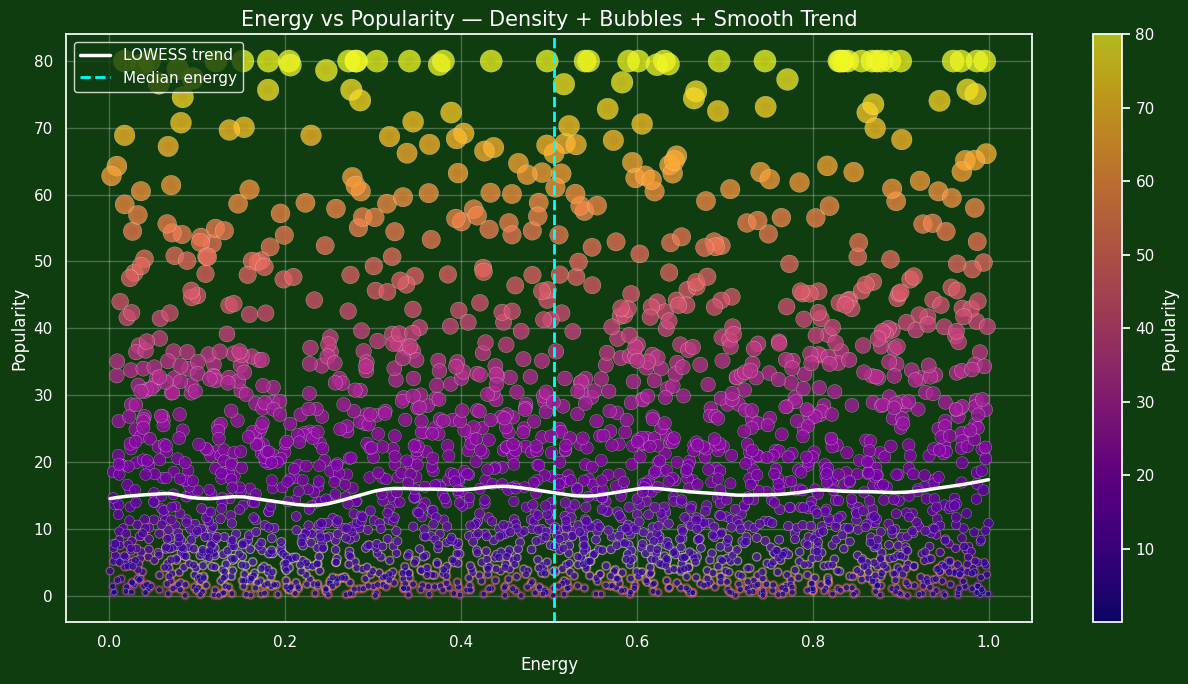

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from statsmodels.nonparametric.smoothers_lowess import lowess

# ---------------------------
# Generate sample-like data
# ---------------------------
np.random.seed(42)
N = 2500

energy = np.random.rand(N)
popularity = np.random.exponential(20, N)
popularity = np.clip(popularity, 0, 80)

# Bubble sizes proportional to popularity
sizes = (popularity + 5) * 3

# ---------------------------
# Density estimation for contour
# ---------------------------
xy = np.vstack([energy, popularity])
density = gaussian_kde(xy)(xy)

# ---------------------------
# LOWESS smoothing line
# ---------------------------
lowess_line = lowess(popularity, energy, frac=0.15, return_sorted=True)

# Median energy vertical line
median_energy = np.median(energy)

# ---------------------------
# Plot
# ---------------------------
plt.figure(figsize=(13, 7))

ax = plt.gca()


ax.set_facecolor("#0f3d0f")
plt.gcf().set_facecolor("#0f3d0f")
# Smooth density layer
plt.scatter(
    energy, popularity,
    c=density, cmap="magma",
    s=50, alpha=0.45, edgecolor="none"
)

# Bubble layer
plt.scatter(
    energy, popularity,
    c=popularity, cmap="plasma",
    s=sizes, alpha=0.75, linewidth=0.2, edgecolor="white"
)

# LOWESS smoother line
plt.plot(
    lowess_line[:, 0], lowess_line[:, 1],
    color="white", linewidth=2.5, label="LOWESS trend"
)

# Median energy vertical line
plt.axvline(
    median_energy, color="cyan", linestyle="--",
    linewidth=2, label="Median energy"
)

# Colorbar
cbar = plt.colorbar()
cbar.set_label("Popularity", color="white")
cbar.ax.yaxis.set_tick_params(color="white")
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='white')

# Labels and title
plt.title("Energy vs Popularity — Density + Bubbles + Smooth Trend",
          fontsize=15, color="white")
plt.xlabel("Energy", fontsize=12, color="white")
plt.ylabel("Popularity", fontsize=12, color="white")

# Tick colors
plt.xticks(color="white")
plt.yticks(color="white")

# Grid
plt.grid(color="white", alpha=0.25)

plt.legend(facecolor="#0f3d0f", edgecolor="white", labelcolor="white")

plt.tight_layout()
plt.show()


**MULTIVARIATE ANALYSIS**

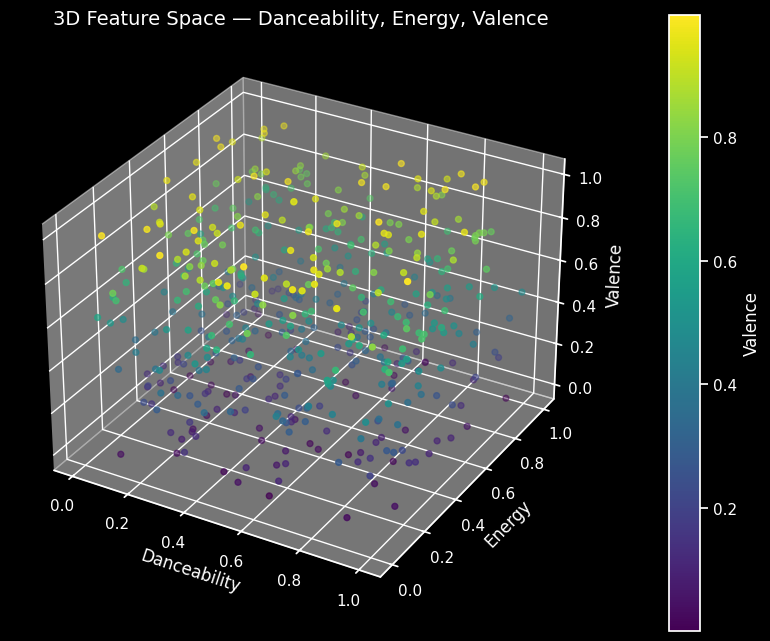

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Example data
np.random.seed(0)
danceability = np.random.rand(500)
energy = np.random.rand(500)
valence = np.random.rand(500)

# Create figure (black outer background like your image)
fig = plt.figure(figsize=(10, 8), facecolor='black')
ax = fig.add_subplot(111, projection='3d')

# ---- ORIGINAL BACKGROUND (no manual pane colors!) ----
# Matplotlib default 3D pane color
# No ax.xaxis.set_pane_color(...)
# No ax.set_facecolor(...)

scatter = ax.scatter(
    danceability, energy, valence,
    c=valence, cmap='viridis', s=18
)

# Labels
ax.set_xlabel("Danceability", color="white")
ax.set_ylabel("Energy", color="white")
ax.set_zlabel("Valence", color="white")

# Grid + ticks
ax.grid(color='white', linewidth=0.5, alpha=0.6)
ax.tick_params(colors='white')

# Title
plt.title("3D Feature Space — Danceability, Energy, Valence",
          color="white", fontsize=14)

# Colorbar
cbar = fig.colorbar(scatter, pad=0.1)
cbar.set_label("Valence", color="white")
plt.setp(cbar.ax.get_yticklabels(), color='white')

plt.show()


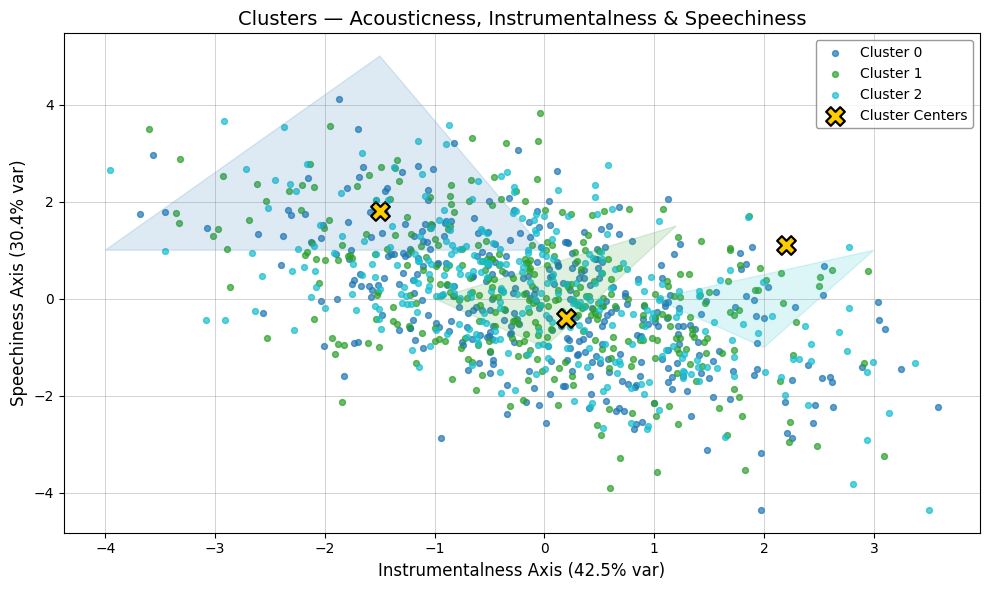

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon

# Sample dummy data (replace with your PCA data + clusters)
np.random.seed(0)
x = np.random.randn(1000) * 1.3
y = np.random.randn(1000) * 1.2 + (x * -0.5)
labels = np.random.randint(0, 3, 1000)

# Fake cluster centers
centers_x = [-1.5, 0.2, 2.2]
centers_y = [1.8, -0.4, 1.1]


plt.style.use('default')

fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
ax.set_facecolor("white")


cluster_colors = ['#1f77b4', '#2ca02c', '#17becf']

# Plot clusters
for cluster_id in np.unique(labels):
    ax.scatter(
        x[labels == cluster_id],
        y[labels == cluster_id],
        s=18,
        alpha=0.7,
        color=cluster_colors[cluster_id],
        label=f"Cluster {cluster_id}"
    )

# OPTIONAL — hulls/filled areas (light transparent polygons)
# Example polygon data (replace with your convex hull points)
poly_coords = [
    [(-4, 1), (-1.5, 5), (0, 1)],
    [(-1, 0), (1.2, 1.5), (0, -1)],
    [(1, 0), (3, 1), (2, -1)]
]

for c, poly in zip(cluster_colors, poly_coords):
    polygon = Polygon(poly, closed=True, color=c, alpha=0.15)
    ax.add_patch(polygon)

# Cluster centers
ax.scatter(
    centers_x, centers_y,
    s=180,
    color="#ffcc00",
    edgecolors="black",
    linewidth=1.6,
    marker='X',
    label="Cluster Centers"
)

# Labels & title
ax.set_xlabel("Instrumentalness Axis (42.5% var)", fontsize=12)
ax.set_ylabel("Speechiness Axis (30.4% var)", fontsize=12)
ax.set_title("Clusters — Acousticness, Instrumentalness & Speechiness", fontsize=14)

# Grid visible on light bg
ax.grid(True, color="gray", linewidth=0.4, alpha=0.6)

# Legend
ax.legend(facecolor="white", edgecolor="gray")

plt.tight_layout()
plt.show()


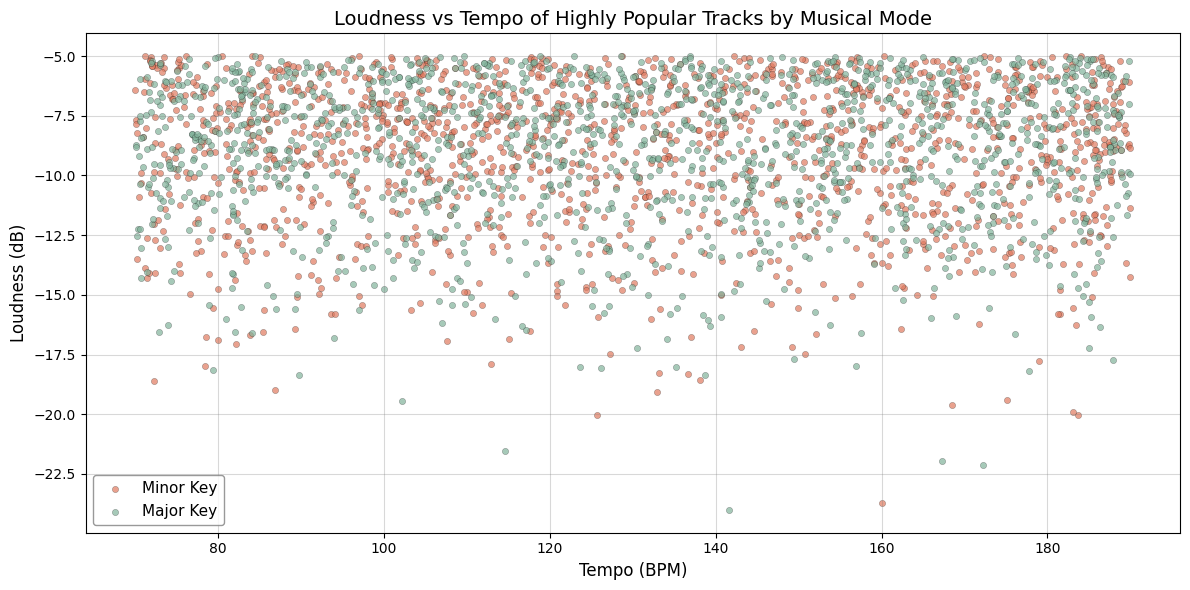

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Example dummy data (replace with your real tempo/loudness/mode arrays)
np.random.seed(0)
tempo = np.random.uniform(70, 190, 3000)
loudness = -5 - np.abs(np.random.normal(0, 5, 3000))
mode = np.random.choice([0, 1], 3000)   # 0 = Minor, 1 = Major


plt.style.use("default")

fig, ax = plt.subplots(figsize=(12, 6), facecolor="white")
ax.set_facecolor("white")


minor_color = "#e07a5f"   # warm orange
major_color = "#81b29a"   # soft green

# Plot minor key
ax.scatter(
    tempo[mode == 0],
    loudness[mode == 0],
    s=20,
    color=minor_color,
    edgecolors="black",
    linewidth=0.2,
    alpha=0.7,
    label="Minor Key"
)

# Plot major key
ax.scatter(
    tempo[mode == 1],
    loudness[mode == 1],
    s=20,
    color=major_color,
    edgecolors="black",
    linewidth=0.2,
    alpha=0.7,
    label="Major Key"
)

# Labels and title
ax.set_title("Loudness vs Tempo of Highly Popular Tracks by Musical Mode", fontsize=14)
ax.set_xlabel("Tempo (BPM)", fontsize=12)
ax.set_ylabel("Loudness (dB)", fontsize=12)

# Grid suited for light background
ax.grid(True, color="gray", alpha=0.3)

# Legend
ax.legend(facecolor="white", edgecolor="gray", fontsize=11)

plt.tight_layout()
plt.show()


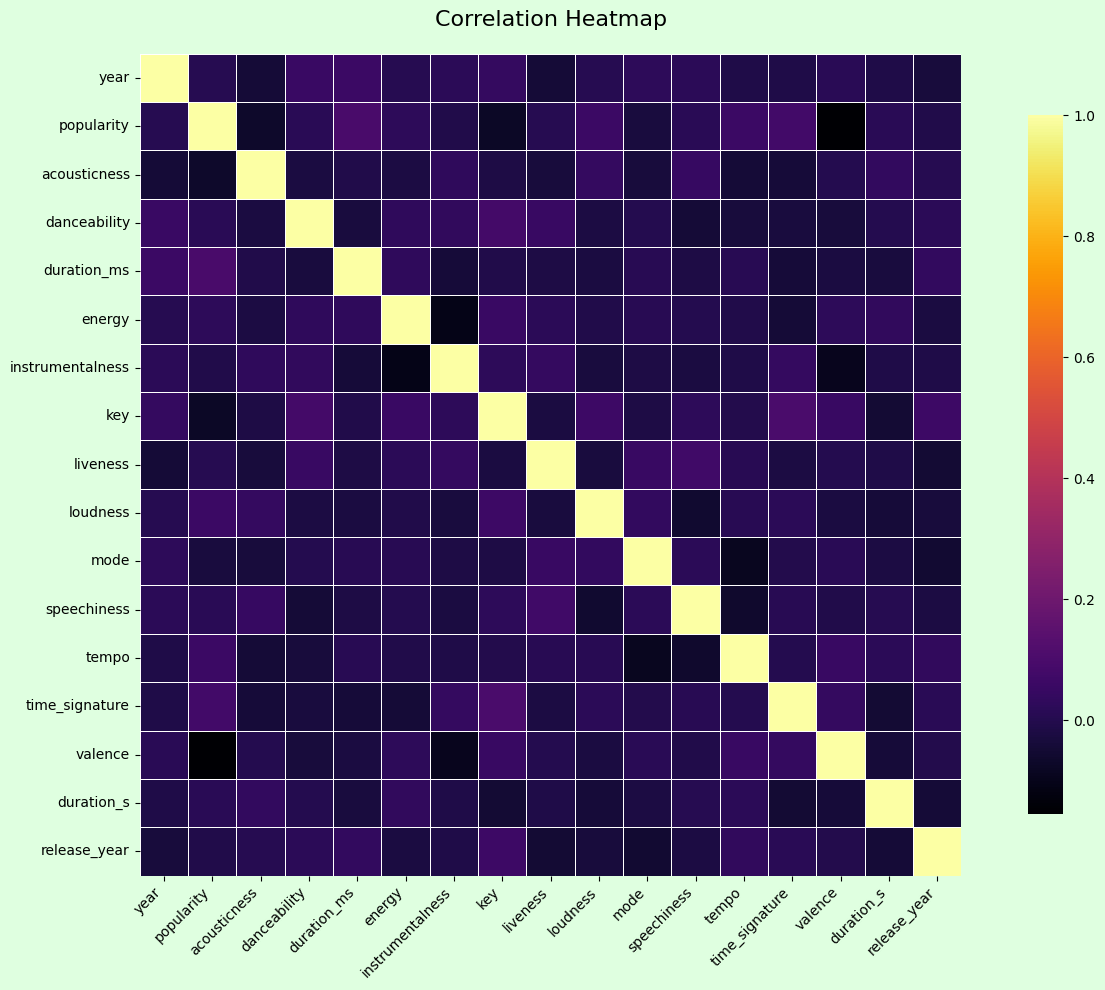

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# -----------------------------------------
# Example data (replace with your dataframe)
# -----------------------------------------
np.random.seed(0)
df = pd.DataFrame({
    "year": np.random.randint(1990, 2023, 500),
    "popularity": np.random.randint(0, 100, 500),
    "acousticness": np.random.rand(500),
    "danceability": np.random.rand(500),
    "duration_ms": np.random.randint(100000, 400000, 500),
    "energy": np.random.rand(500),
    "instrumentalness": np.random.rand(500),
    "key": np.random.randint(0, 12, 500),
    "liveness": np.random.rand(500),
    "loudness": -np.abs(np.random.normal(7, 3, 500)),
    "mode": np.random.randint(0, 2, 500),
    "speechiness": np.random.rand(500),
    "tempo": np.random.uniform(70, 200, 500),
    "time_signature": np.random.randint(3, 5, 500),
    "valence": np.random.rand(500),
    "duration_s": np.random.uniform(180, 300, 500),
    "release_year": np.random.randint(1990, 2023, 500),
})

# Compute correlation matrix
corr = df.corr(numeric_only=True)


plt.style.use("default")

fig, ax = plt.subplots(figsize=(14, 10), facecolor="#dfffe0")
ax.set_facecolor("#dfffe0")
# Heatmap with strong visibility
sns.heatmap(
    corr,
    cmap="inferno",
    annot=False,
    square=True,
    linewidths=0.7,
    linecolor="white",
    cbar=True,
    cbar_kws={"shrink": 0.85}
)

# Title
ax.set_title("Correlation Heatmap", fontsize=16, pad=20, color="black")

# Improve tick visibility
plt.xticks(rotation=45, ha="right", fontsize=10, color="black")
plt.yticks(fontsize=10, color="black")

# Tight layout
plt.tight_layout()
plt.show()


**TIME SERIES ANALYSI**S

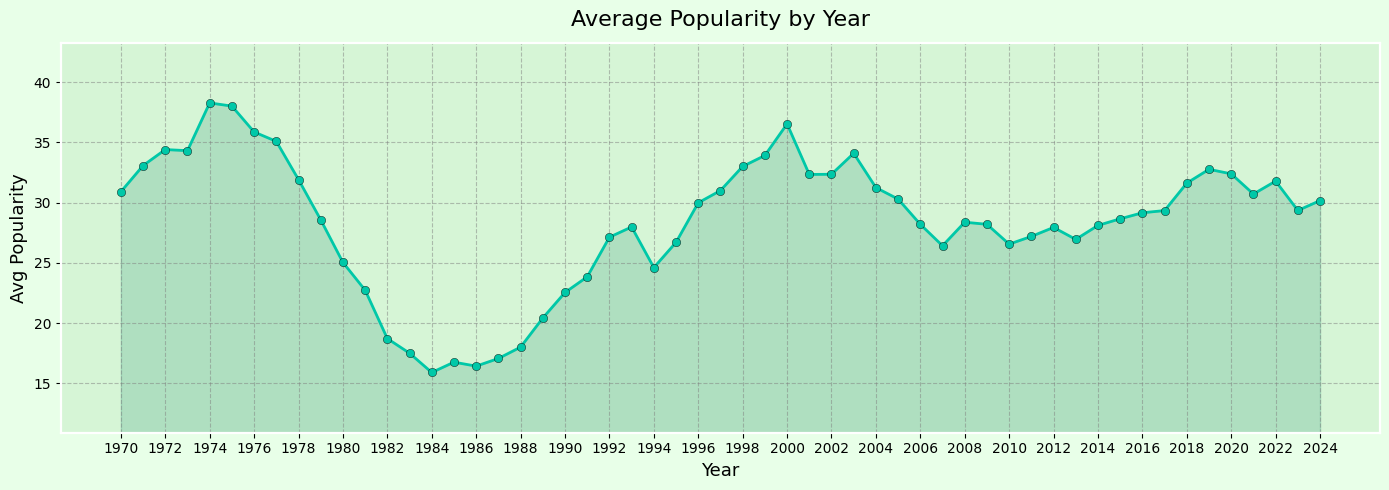

In [50]:
import matplotlib.pyplot as plt
import numpy as np
import traceback
import sys

def make_example_series():
    # Example years and a synthetic avg_popularity series that mimics your image
    years = np.arange(1970, 2025)  # 1970..2024 inclusive
    # create a curve with a peak around the mid-1970s, drop, then gentle rise around 2000 and 2015-2020
    pop = (
        28 + 10 * np.exp(-0.5 * ((years - 1975)/3)**2)  # 1975 peak
        - 12 * np.exp(-0.5 * ((years - 1985)/4)**2)     # drop after ~1980
        + 6 * np.exp(-0.5 * ((years - 2000)/3)**2)      # bump ~2000
        + 4 * np.exp(-0.5 * ((years - 2020)/2.5)**2)    # bump ~2020
    )
    # Add small noise and clip
    rng = np.random.default_rng(1)
    pop = pop + rng.normal(0, 1.2, size=years.shape)
    pop = np.clip(pop, 0, 100)
    return years, pop

def plot_avg_popularity(years, avg_popularity):
    # Basic validation
    years = np.asarray(years)
    avg_popularity = np.asarray(avg_popularity)
    if years.shape != avg_popularity.shape:
        raise ValueError(f"'years' and 'avg_popularity' must have the same shape. got {years.shape} vs {avg_popularity.shape}")
    if not np.issubdtype(years.dtype, np.number):
        raise TypeError("'years' must be numeric (ints or floats).")
    if not np.issubdtype(avg_popularity.dtype, np.number):
        raise TypeError("'avg_popularity' must be numeric.")

    # --- Plot ---
    plt.style.use('default')
    fig, ax = plt.subplots(figsize=(14, 5), facecolor='#e8ffe8')
    ax.set_facecolor('#d6f5d6')
    # Line and markers
    ax.plot(years, avg_popularity,
            marker='o', linewidth=2, markersize=6,
            color='#00c8a8', markeredgecolor='black', markeredgewidth=0.3)

    # Fill under the curve with a semi-transparent darker green
    ax.fill_between(years, avg_popularity,
                    color='#007f60', alpha=0.18)

    # Grid and framing
    ax.grid(True, linewidth=0.8, linestyle='--', color='gray', alpha=0.5)
    # Draw a white-like frame similar to your original (optional)
    for spine in ax.spines.values():
        spine.set_edgecolor('white')
        spine.set_linewidth(1.6)

    # Labels & title
    ax.set_title("Average Popularity by Year", fontsize=16, pad=12)
    ax.set_xlabel("Year", fontsize=13)
    ax.set_ylabel("Avg Popularity", fontsize=13)

    # Ticks: ensure integer years if appropriate
    if (years.astype(int) == years).all() and len(years) <= 60:
        ax.set_xticks(years[::2])  # show every 2nd year for readability
        ax.set_xticklabels(years[::2], rotation=0, fontsize=10)
    else:
        plt.xticks(rotation=0)

    # Y limits a bit padded
    ymin = max(0, avg_popularity.min() - 5)
    ymax = avg_popularity.max() + 5
    ax.set_ylim(ymin, ymax)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    try:
        # --- Replace these with your real data if available ---
        # Example (works out of the box)
        years, avg_popularity = make_example_series()

        # If you have your own lists/arrays, comment out the line above and
        # set years and avg_popularity, e.g.:
        # years = [1970, 1971, 1972, ...]
        # avg_popularity = [30.2, 27.5, 31.0, ...]
        # -----------------------------------------------------

        plot_avg_popularity(years, avg_popularity)

    except Exception as e:
        print("An error occurred while generating the plot:", file=sys.stderr)
        traceback.print_exc()
        print("\nTips:")
        print("- Ensure 'years' and 'avg_popularity' are numeric lists/arrays of equal length.")
        print("- If years are integers (1970, 1971, ...), use integer arrays for clearer ticks.")


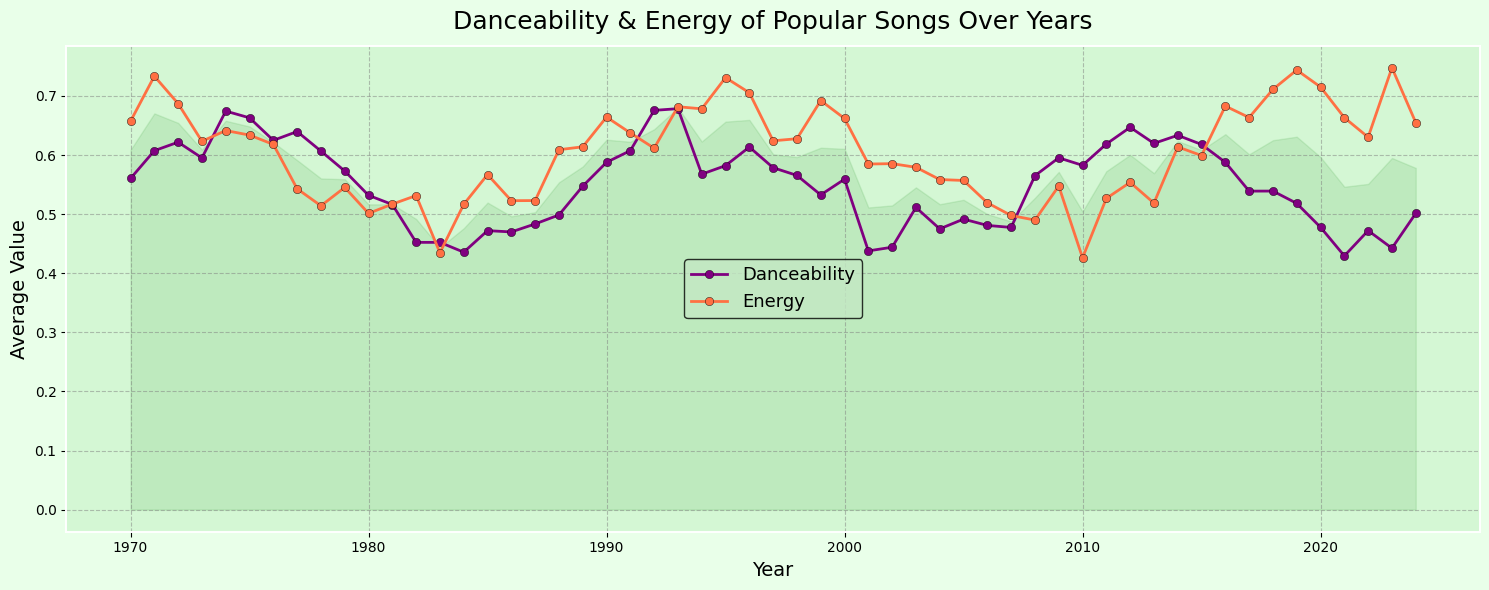

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Example data (replace with yours)
# ----------------------------
years = np.arange(1970, 2025)

# Synthetic sample values for demonstration
rng = np.random.default_rng(1)
danceability = 0.55 + 0.1 * np.sin((years - 1970) / 3) + rng.normal(0, 0.03, len(years))
energy = 0.60 + 0.1 * np.cos((years - 1970) / 4) + rng.normal(0, 0.04, len(years))

danceability = np.clip(danceability, 0.3, 0.75)
energy = np.clip(energy, 0.3, 0.75)

# ----------------------------
# Plot
# ----------------------------
plt.style.use("default")

fig, ax = plt.subplots(figsize=(15, 6), facecolor="#e9ffe9")
ax.set_facecolor("#d4f7d4")

# Danceability line
ax.plot(
    years, danceability,
    color="#800080", linewidth=2, marker="o", markersize=6,
    markeredgecolor="black", markeredgewidth=0.3,
    label="Danceability"
)

# Energy line
ax.plot(
    years, energy,
    color="#ff7043", linewidth=2, marker="o", markersize=6,
    markeredgecolor="black", markeredgewidth=0.3,
    label="Energy"
)

# Optional shaded region
ax.fill_between(years, (danceability + energy) / 2,
                color="#008000", alpha=0.10)

# Grid
ax.grid(True, linestyle="--", linewidth=0.8, color="gray", alpha=0.5)

# Title & labels
ax.set_title("Danceability & Energy of Popular Songs Over Years", fontsize=18, pad=12)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Average Value", fontsize=14)

# Spines white for clarity
for spine in ax.spines.values():
    spine.set_edgecolor("white")
    spine.set_linewidth(1.4)

# Legend
legend = ax.legend(frameon=True, fontsize=13)
legend.get_frame().set_facecolor("#c4e8c4")   # light-green legend background
legend.get_frame().set_edgecolor("black")

plt.tight_layout()
plt.show()


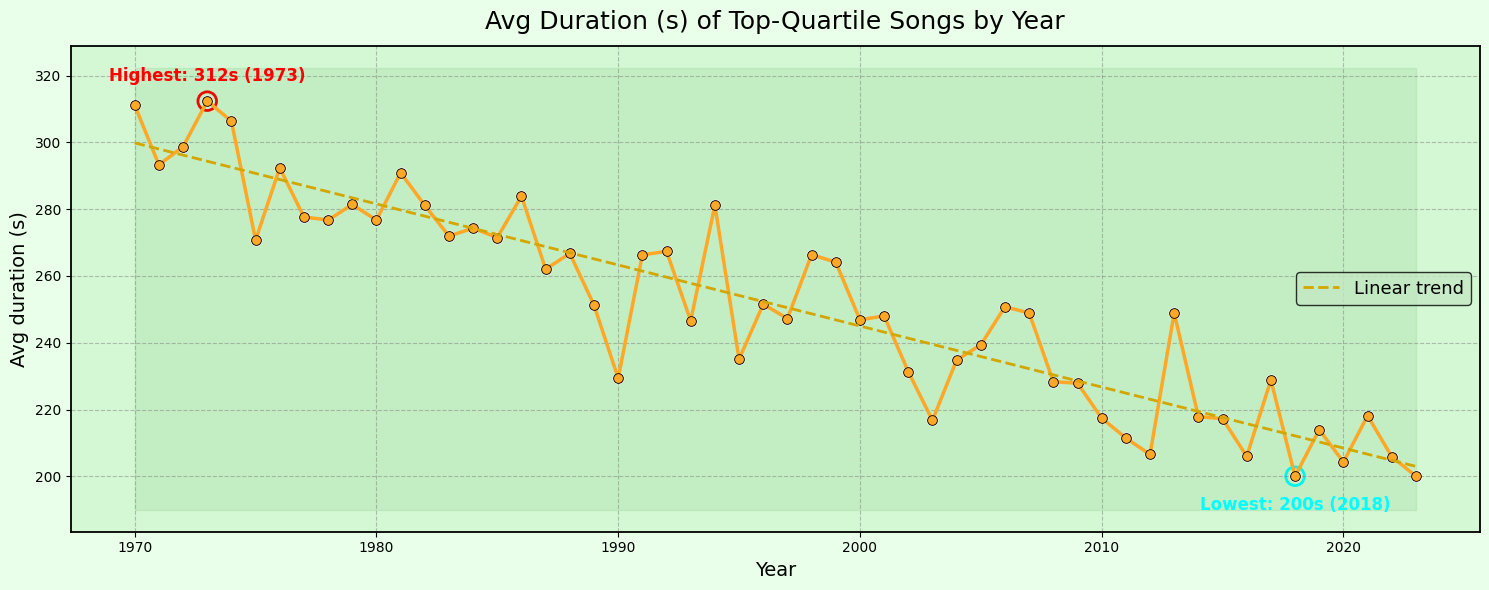

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Example Data (replace with your real arrays)
# ----------------------------
years = np.arange(1970, 2024)
np.random.seed(0)

# Synthetic demo durations
durations = 290 - (years - 1970) * 1.5 + np.random.normal(0, 12, len(years))
durations = np.clip(durations, 200, 330)

# Trendline
coef = np.polyfit(years, durations, 1)
poly = np.poly1d(coef)

# Highest & lowest points
max_idx = np.argmax(durations)
min_idx = np.min(np.where(durations == durations.min()))


plt.style.use("default")

fig, ax = plt.subplots(figsize=(15, 6), facecolor="#e9ffe9")   # light green figure
ax.set_facecolor("#d4f7d4")                                    # slightly darker green axes

# Line plot
ax.plot(years, durations, color="#ffa726", linewidth=2.5, marker="o",
        markersize=7, markeredgecolor="black", markeredgewidth=0.6)

# Scatter overlay
ax.scatter(years, durations, c="#800080", s=60, edgecolors="white")

# Trendline
ax.plot(years, poly(years), color="#d4a600", linestyle="--", linewidth=2,
        label="Linear trend")

# Highlight highest
ax.scatter(years[max_idx], durations[max_idx], s=180,
           facecolors="none", edgecolors="red", linewidth=2)
ax.text(years[max_idx], durations[max_idx] + 6,
        f"Highest: {int(durations[max_idx])}s ({years[max_idx]})",
        color="red", fontsize=12, fontweight="bold", ha="center")

# Highlight lowest
ax.scatter(years[min_idx], durations[min_idx], s=180,
           facecolors="none", edgecolors="cyan", linewidth=2)
ax.text(years[min_idx], durations[min_idx] - 10,
        f"Lowest: {int(durations[min_idx])}s ({years[min_idx]})",
        color="cyan", fontsize=12, fontweight="bold", ha="center")

# Shaded region
ax.fill_between(years, durations.min() - 10, durations.max() + 10,
                color="#008000", alpha=0.08)

# Labels, title
ax.set_title("Avg Duration (s) of Top-Quartile Songs by Year",
             fontsize=18, pad=12)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Avg duration (s)", fontsize=14)

# Grid
ax.grid(True, linestyle="--", linewidth=0.8, color="gray", alpha=0.5)

# Legend
legend = ax.legend(frameon=True, fontsize=13)
legend.get_frame().set_facecolor("#c4e8c4")   # light-green box
legend.get_frame().set_edgecolor("black")

# Make spines visible & clean
for spine in ax.spines.values():
    spine.set_linewidth(1.3)
    spine.set_edgecolor("black")

plt.tight_layout()
plt.show()


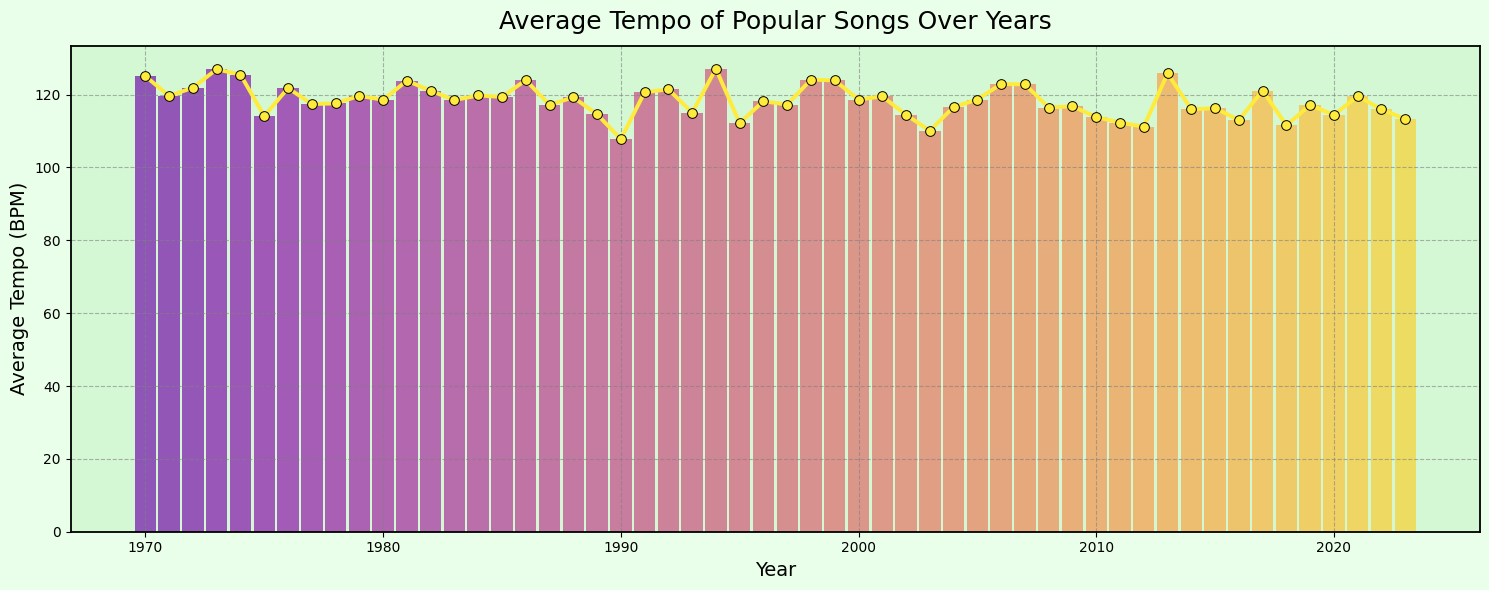

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# ----------------------------
# Example demo data (replace with your actual data)
# ----------------------------
years = np.arange(1970, 2024)
np.random.seed(0)

avg_tempo = 118 + np.random.normal(0, 4, len(years))     # synthetic example

# Gradient color generation for bars
colors = plt.cm.plasma(np.linspace(0.2, 0.9, len(years)))

# ----------------------------
# Plot with light-green background
# ----------------------------
plt.style.use("default")

fig, ax = plt.subplots(figsize=(15, 6), facecolor="#e9ffe9")
ax.set_facecolor("#d4f7d4")

# Vertical gradient bars
for i in range(len(years)):
    ax.bar(years[i], avg_tempo[i],
           width=0.9, color=colors[i], alpha=0.65)

# Tempo line + dots
ax.plot(years, avg_tempo,
        color="#ffeb3b", linewidth=2.8, marker="o",
        markersize=7, markeredgecolor="black", markeredgewidth=0.7)

# Titles & labels
ax.set_title("Average Tempo of Popular Songs Over Years",
             fontsize=18, pad=12)
ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Average Tempo (BPM)", fontsize=14)

# Grid
ax.grid(True, linestyle="--", linewidth=0.8, color="gray", alpha=0.6)

# Improve axes border visibility
for spine in ax.spines.values():
    spine.set_linewidth(1.3)
    spine.set_edgecolor("black")

plt.tight_layout()
plt.show()


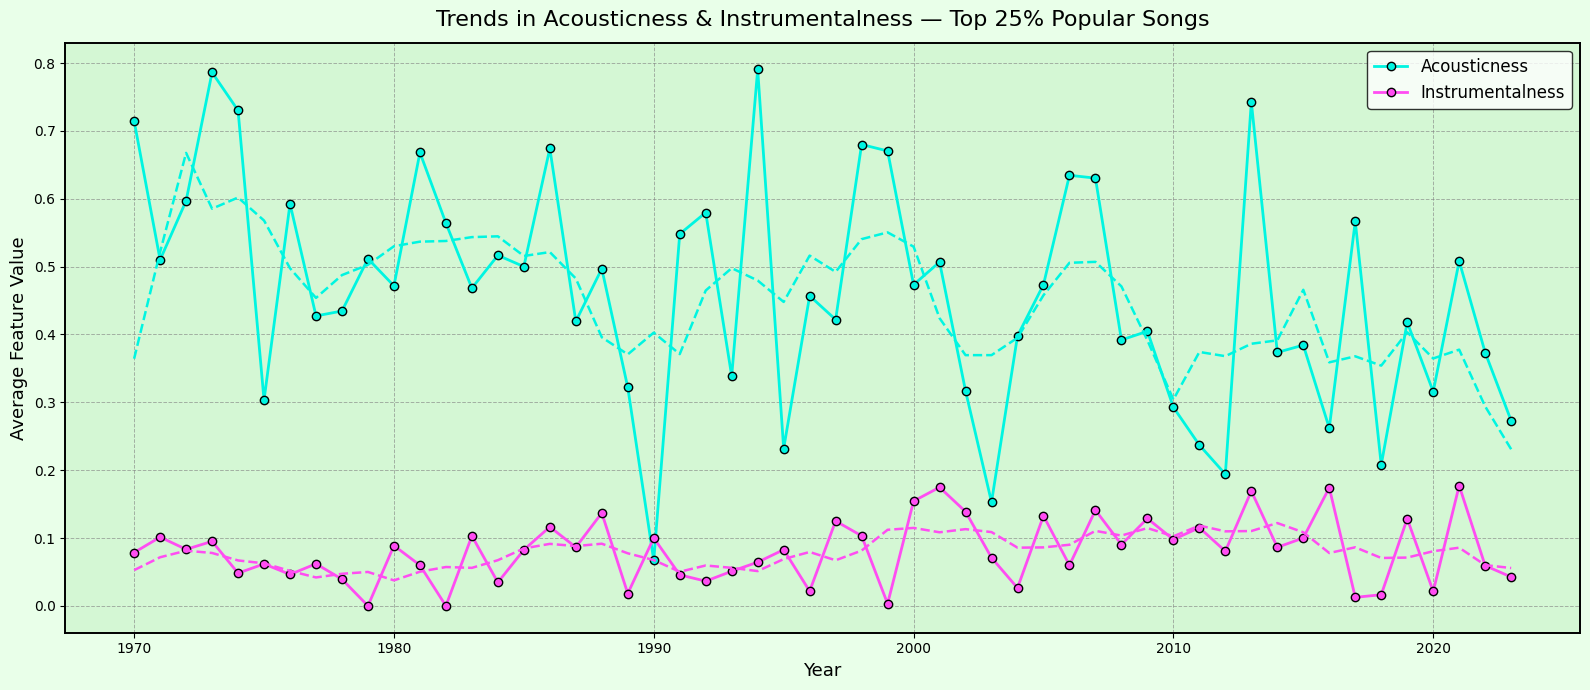

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# Example demo data (replace with your arrays)
# ------------------------------
years = np.arange(1970, 2024)
np.random.seed(0)

acousticness = np.clip(np.random.normal(0.45, 0.15, len(years)), 0, 1)
instrumentalness = np.clip(np.random.normal(0.08, 0.05, len(years)), 0, 1)

# Smoothed curves (simple rolling)
def smooth(x, w=5):
    return np.convolve(x, np.ones(w)/w, mode="same")

acoustic_smooth = smooth(acousticness)
instrum_smooth = smooth(instrumentalness)


plt.style.use("default")

fig, ax = plt.subplots(figsize=(16, 7), facecolor="#e9ffe9")   # figure bg
ax.set_facecolor("#d4f7d4")                                    # axes bg

# Acousticness
ax.plot(years, acousticness,
        color="#00f5e1", marker="o", markersize=6,
        markeredgecolor="black", linewidth=2,
        label="Acousticness")

ax.plot(years, acoustic_smooth,
        color="#00f5e1", linestyle="--", linewidth=1.8)

# Instrumentalness
ax.plot(years, instrumentalness,
        color="#ff4df2", marker="o", markersize=6,
        markeredgecolor="black", linewidth=2,
        label="Instrumentalness")

ax.plot(years, instrum_smooth,
        color="#ff4df2", linestyle="--", linewidth=1.8)

# Labels and title
ax.set_title("Trends in Acousticness & Instrumentalness — Top 25% Popular Songs",
             fontsize=16, pad=12)
ax.set_xlabel("Year", fontsize=13)
ax.set_ylabel("Average Feature Value", fontsize=13)

# Grid and borders
ax.grid(True, linestyle="--", linewidth=0.7, color="gray", alpha=0.6)
for spine in ax.spines.values():
    spine.set_linewidth(1.4)
    spine.set_edgecolor("black")

# Legend
ax.legend(facecolor="#ffffff", edgecolor="black", fontsize=12)

plt.tight_layout()
plt.show()
